In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from Tools import *


In [6]:

Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]
pressure = np.linspace(1,1,1).tolist()
temperature = np.linspace(1000,2000,11).tolist()
phi = np.round(np.linspace(0.5, 2.0, 8), 1).tolist()
mixture =np.linspace(0.85,0.85,1).tolist()
case = generate_test_cases_bifuel(temperature,pressure,phi,mixture)

In [7]:
Temp_det =pd.read_pickle("Temp_det.pkl")
Time_det =pd.read_pickle("Time_det.pkl")
Y_Target_det = pd.read_pickle("Y_Target_det.pkl")
Y_NonTarget_det =pd.read_pickle("Y_Non_target_det.pkl")

In [8]:
Temp_red =pd.read_pickle("Temp_red.pkl")
Time_red =pd.read_pickle("Time_red.pkl")
Y_Target_red = pd.read_pickle("Y_Target_red.pkl")
Y_NonTarget_red =pd.read_pickle("Y_Non_target_red.pkl")

In [10]:
Temp_OptimA =pd.read_pickle("Temp_red_optim1.pkl")
Time_OptimA =pd.read_pickle("Time_red_optim1.pkl")
Y_Target_OptimA = pd.read_pickle("Y_Target_red_optim1.pkl")
Y_NonTarget_OptimA =pd.read_pickle("Y_Non_target_red_optim1.pkl")

In [11]:
Temp_OptimB =pd.read_pickle("Temp_red_optim2.pkl")
Time_OptimB =pd.read_pickle("Time_red_optim2.pkl")
Y_Target_OptimB = pd.read_pickle("Y_Target_red_optim2.pkl")
Y_NonTarget_OptimB =pd.read_pickle("Y_Non_target_red_optim2.pkl")

# Brut Data

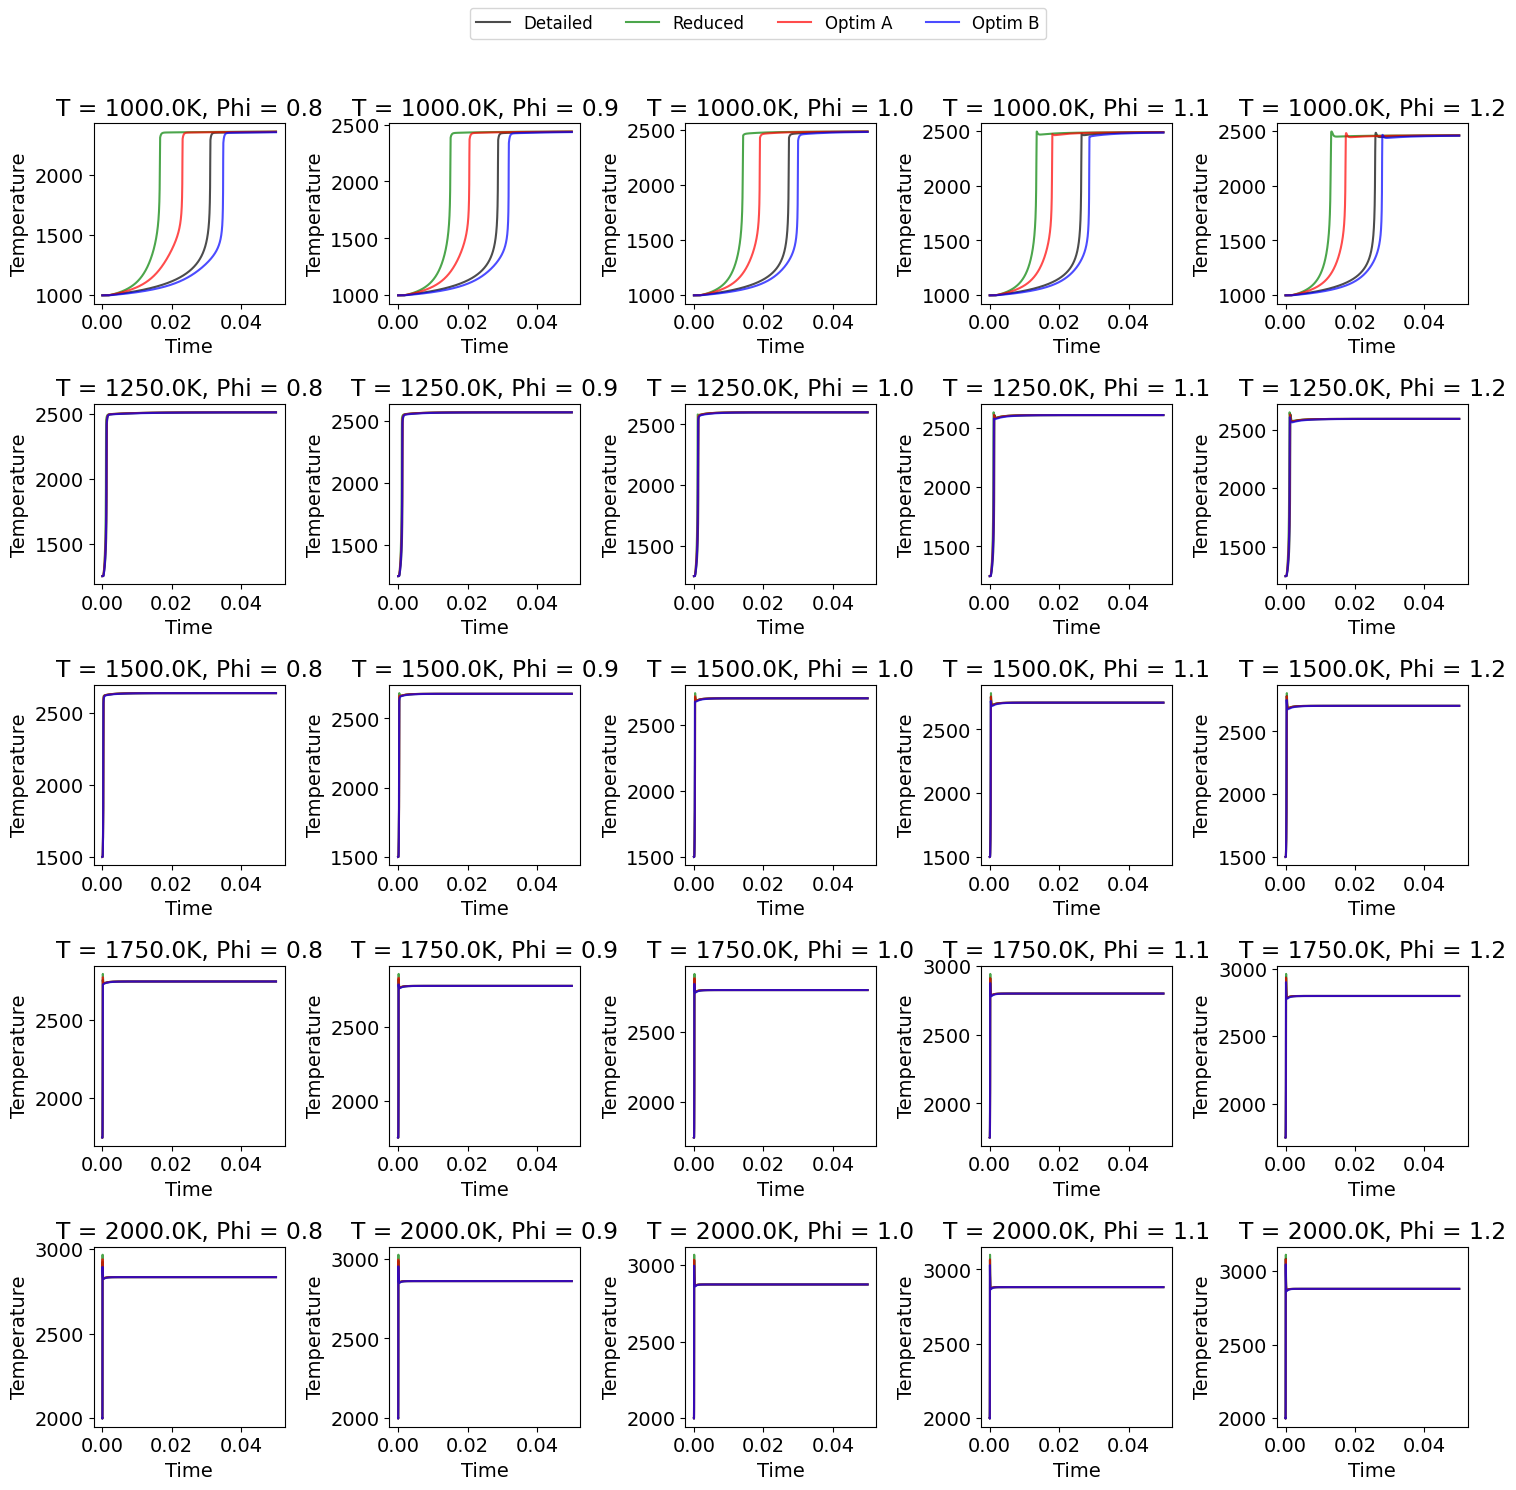

In [417]:
plt.rcParams.update({'font.size': 14}) 
# Create a single figure with 25 subplots (5 rows and 5 columns)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each case and plot on the corresponding subplot
for i in range(len(case)):
    ax = axs[i]
    ax.plot(Time_det[i], Temp_det[i], "-k", label="Detailed", alpha=0.7)
    ax.plot(Time_red[i], Temp_red[i], "-g", label="Reduced", alpha=0.7)
    ax.plot(Time_OptimA[i], Temp_OptimA[i], "-r", label="Optim A", alpha=0.7)
    ax.plot(Time_OptimB[i], Temp_OptimB[i], "-b", label="Optim B", alpha=0.7)
    ax.set_title(f"T = {case[i][1]}K, Phi = {case[i][2]}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')

# Create a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()  # Get legend elements from one subplot
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the legend
plt.show()


# SHIFT

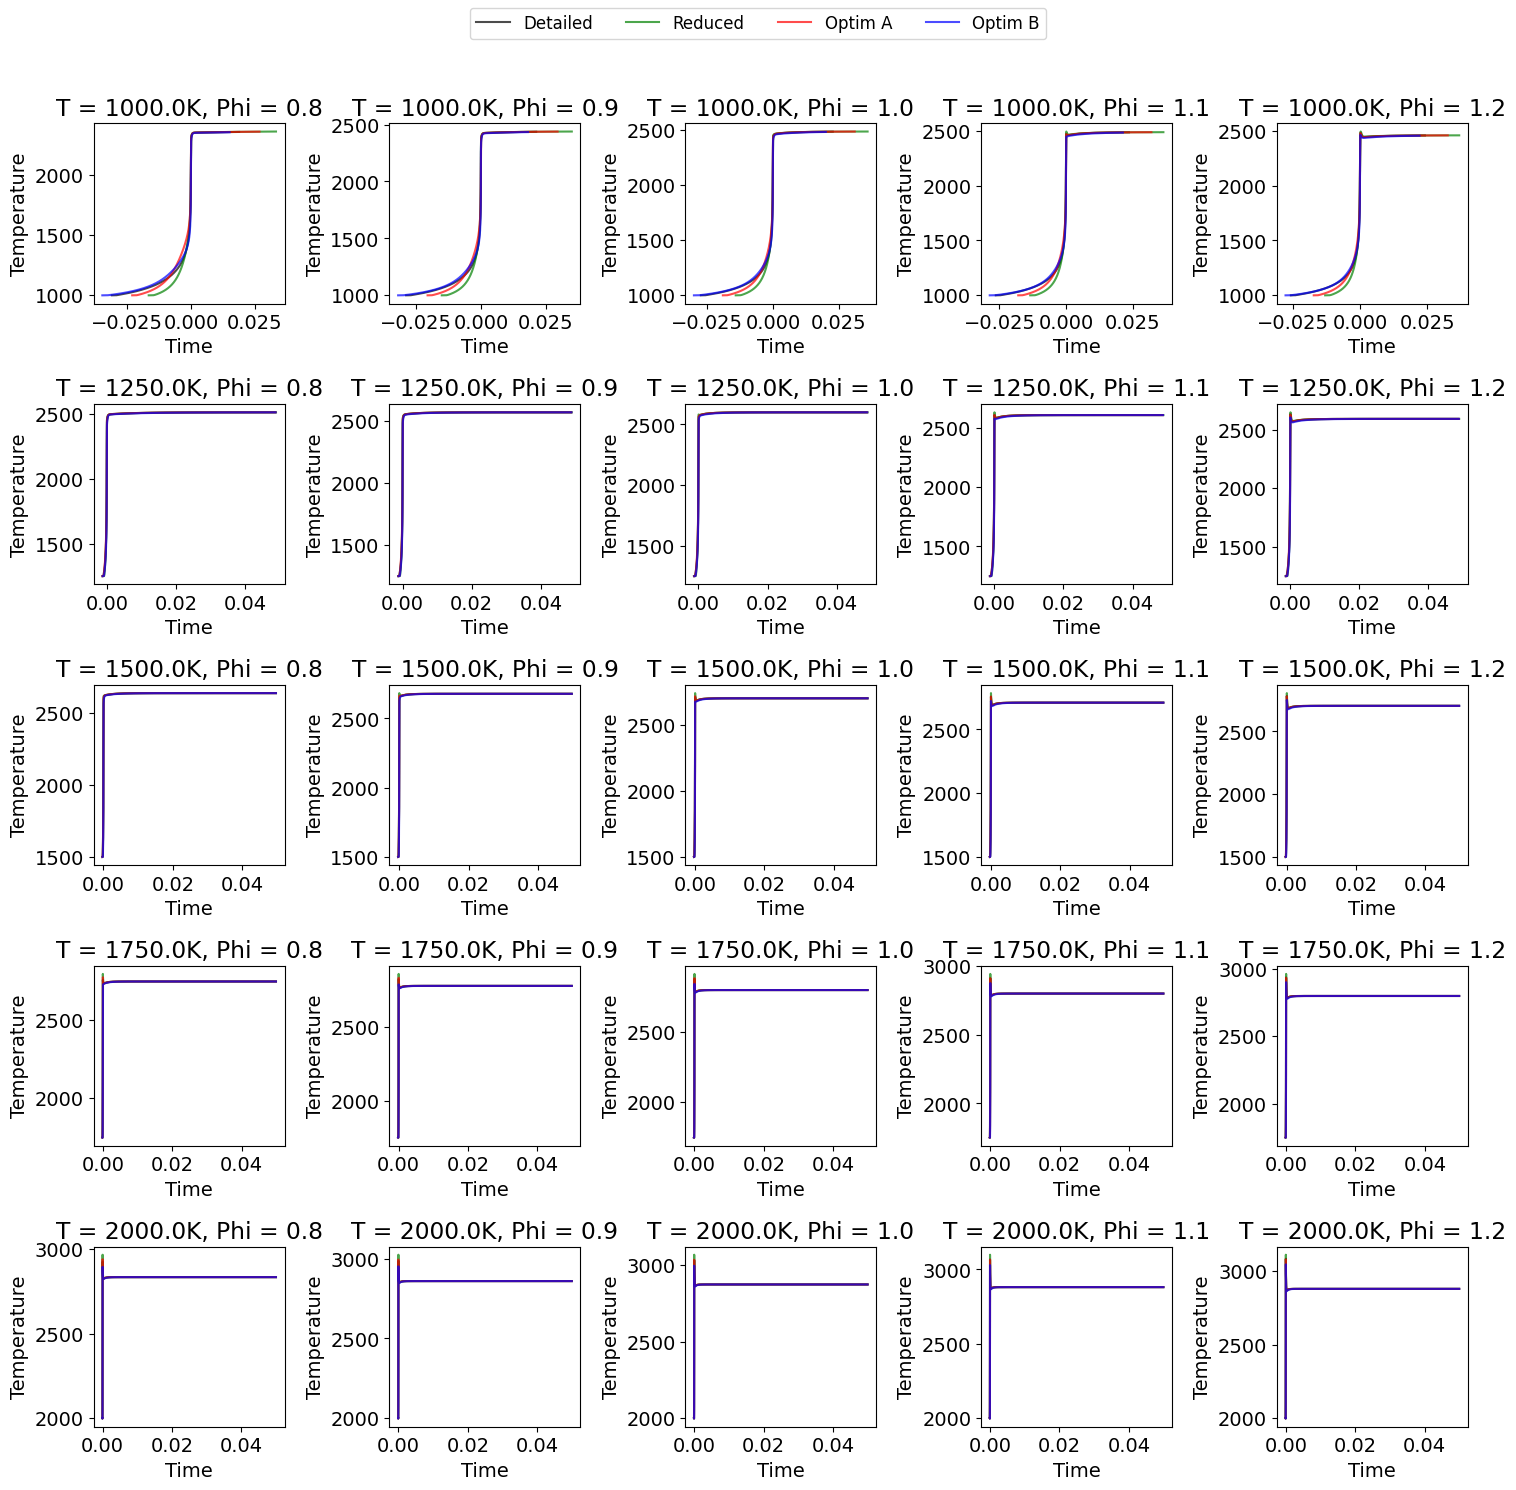

In [496]:
IDT_det = Calc_ai_delay(Time_det,Temp_det,case)
IDT_red = Calc_ai_delay(Time_red,Temp_red,case)
IDT_OptimA = Calc_ai_delay(Time_OptimA,Temp_OptimA,case)
IDT_OptimB = Calc_ai_delay(Time_OptimB,Temp_OptimB,case)



Time_shift= True  
if Time_shift == True : 
        
    for i in range(len(case)) : 
        Time_det[i] = np.array(Time_det[i]) - IDT_det[i]
        Time_red[i] = np.array(Time_red[i]) - IDT_red[i]
        Time_OptimA[i] = np.array(Time_OptimA[i]) - IDT_OptimA[i]
        Time_OptimB[i] = np.array(Time_OptimB[i]) - IDT_OptimB[i]
        
    
plt.rcParams.update({'font.size': 14}) 
# Create a single figure with 25 subplots (5 rows and 5 columns)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each case and plot on the corresponding subplot
for i in range(len(case)):
    ax = axs[i]
    ax.plot(Time_det[i], Temp_det[i], "-k", label="Detailed", alpha=0.7)
    ax.plot(Time_red[i], Temp_red[i], "-g", label="Reduced", alpha=0.7)
    ax.plot(Time_OptimA[i], Temp_OptimA[i], "-r", label="Optim A", alpha=0.7)
    ax.plot(Time_OptimB[i], Temp_OptimB[i], "-b", label="Optim B", alpha=0.7)
    ax.set_title(f"T = {case[i][1]}K, Phi = {case[i][2]}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')

# Create a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()  # Get legend elements from one subplot
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the legend
plt.show()


# SHRINK

In [497]:
def Time_size(time,temp,case,eps = 0.999) : 
    output_time = []
    output_temp = []
    for c in range(len(case)) : 
        loc_time = np.array(time[c])[::-1]
        loc_temp = np.array(temp[c])[::-1]
        mask = np.where(loc_temp/loc_temp[0] < eps)[0][0]
        
        loc_time_mask = loc_time[mask:]
        loc_temp_mask = loc_temp[mask:]
        # print(mask)
        # mask = np.argmax(np.gradient(loc_temp,loc_time))+eps
        # mask = (loc_temp >= min(loc_time))&(loc_time<max(loc_time)/3)
        
        output_time.append(loc_time_mask[::-1])
        output_temp.append(loc_temp_mask[::-1])
    return output_time, output_temp

New_Time_det,New_Temp_det = Time_size(Time_det,Temp_det,case)
New_Time_red,New_Temp_red = Time_size(Time_red,Temp_red,case) # Pas Forcement Utile 
New_Time_OptimA,New_Temp_OptimA = Time_size(Time_OptimA,Temp_OptimA,case)
New_Time_OptimB,New_Temp_OptimB = Time_size(Time_OptimB,Temp_OptimB,case) # Pas Forcement Utile 


# Log 

In [498]:
log = False 
if log == True : 
    Y_Target_det = np.log(Y_Target_det)
    Y_Target_red = np.log(Y_Target_red)
    Y_Target_OptimA = np.log(Y_Target_OptimA)
    Y_Target_OptimB = np.log(Y_Target_OptimB)

# Commun Grid & Interpol

In [499]:
def Generate_commun_grid(time,case,lenght):
    output = [] 
    for c in range(len(case)) : 
        loc_time = time[c]
        output.append(np.linspace(np.min(loc_time),np.max(loc_time),lenght)) 
    
    return output 
    

In [500]:
Commun_time = Generate_commun_grid(New_Time_det,case,500)

In [501]:
def Interpol_temp(time,temp,grid,case) : 
    output = [] 
    for c in range(len(case)) : 
        loc_time = time[c]
        loc_grid = grid[c]
        loc_temp = temp[c]
        int_func = interp1d(loc_time,loc_temp,fill_value="extrapolate")
        output.append(int_func(loc_grid))
    return output

In [502]:
Interp_Temp_det = Interpol_temp(Time_det,Temp_det,Commun_time,case)
Interp_Temp_red = Interpol_temp(Time_red,Temp_red,Commun_time,case)
Interp_Temp_OptimA= Interpol_temp(Time_OptimA,Temp_OptimA,Commun_time,case)
Interp_Temp_OptimB = Interpol_temp(Time_OptimB,Temp_OptimB,Commun_time,case)

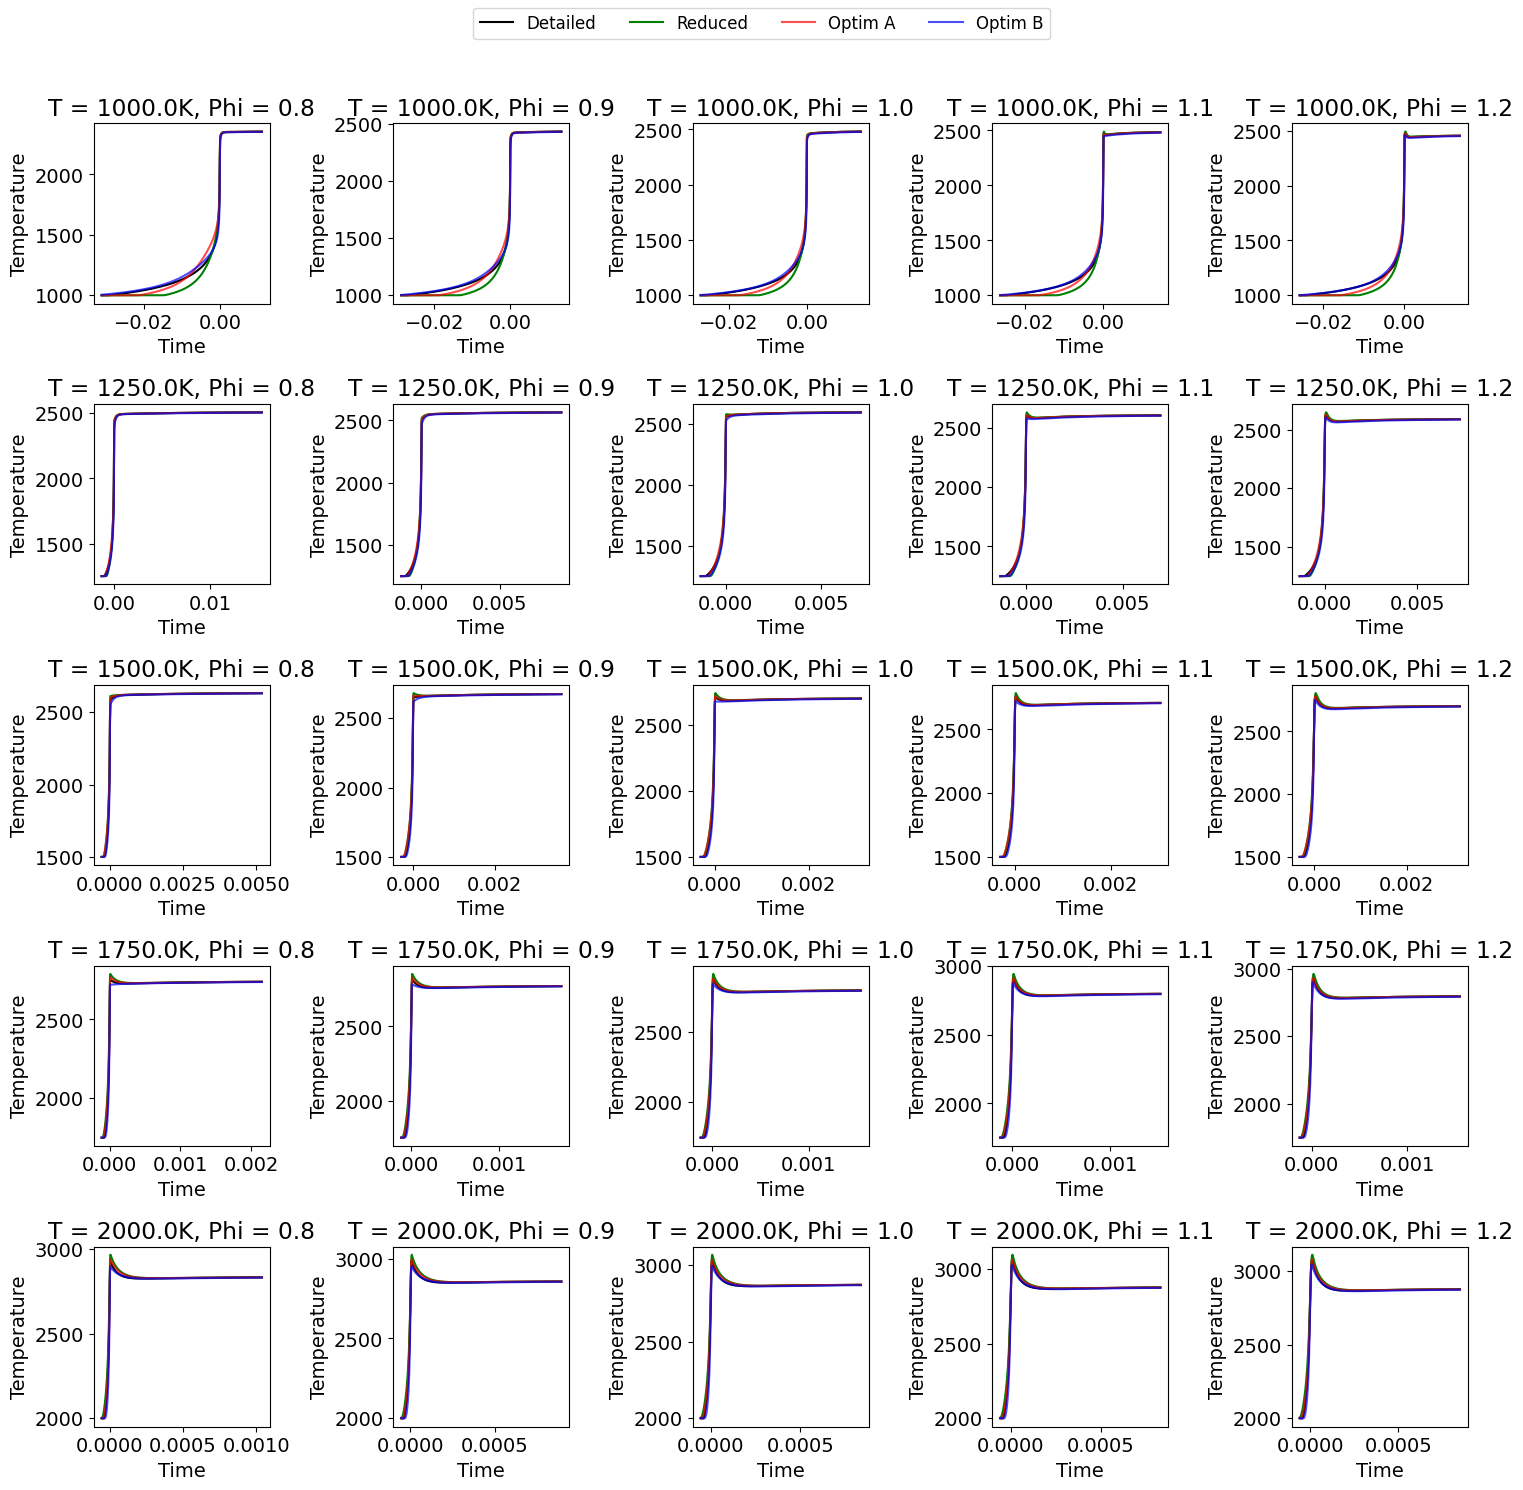

In [503]:
    
plt.rcParams.update({'font.size': 14}) 
# Create a single figure with 25 subplots (5 rows and 5 columns)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each case and plot on the corresponding subplot
for i in range(len(case)):
    ax = axs[i]
    ax.plot(Commun_time[i], Interp_Temp_det[i], "-k", label="Detailed")
    ax.plot(Commun_time[i], Interp_Temp_red[i], "-g", label="Reduced")
    ax.plot(Commun_time[i], Interp_Temp_OptimA[i], "-r", label="Optim A", alpha=0.7)
    ax.plot(Commun_time[i], Interp_Temp_OptimB[i], "-b", label="Optim B", alpha=0.7)
    ax.set_title(f"T = {case[i][1]}K, Phi = {case[i][2]}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')

# Create a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()  # Get legend elements from one subplot
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the legend
plt.show()


In [504]:
def Interpol_Y(time,data,Commun_time,case,spec) : 
    output = []
    for c in range(len(case)):
        loc_time = time[c]
        loc_data = data[c]
        loc_commun_time = Commun_time[c]
        loc_output = []
        for s in range(len(spec)): 
    
            int_func = interp1d(loc_time,loc_data[:,s],fill_value="extrapolate")
            loc_output.append(int_func(loc_commun_time))
        output.append(loc_output)
    return output
    

In [505]:
Interp_Y_det = Interpol_Y(Time_det,Y_Target_det,Commun_time,case,Targets)
Interp_Y_red = Interpol_Y(Time_red,Y_Target_red,Commun_time,case,Targets)
Interp_Y_OptimA = Interpol_Y(Time_OptimA,Y_Target_OptimA,Commun_time,case,Targets)
Interp_Y_OptimB = Interpol_Y(Time_OptimB,Y_Target_OptimB,Commun_time,case,Targets)

NH3


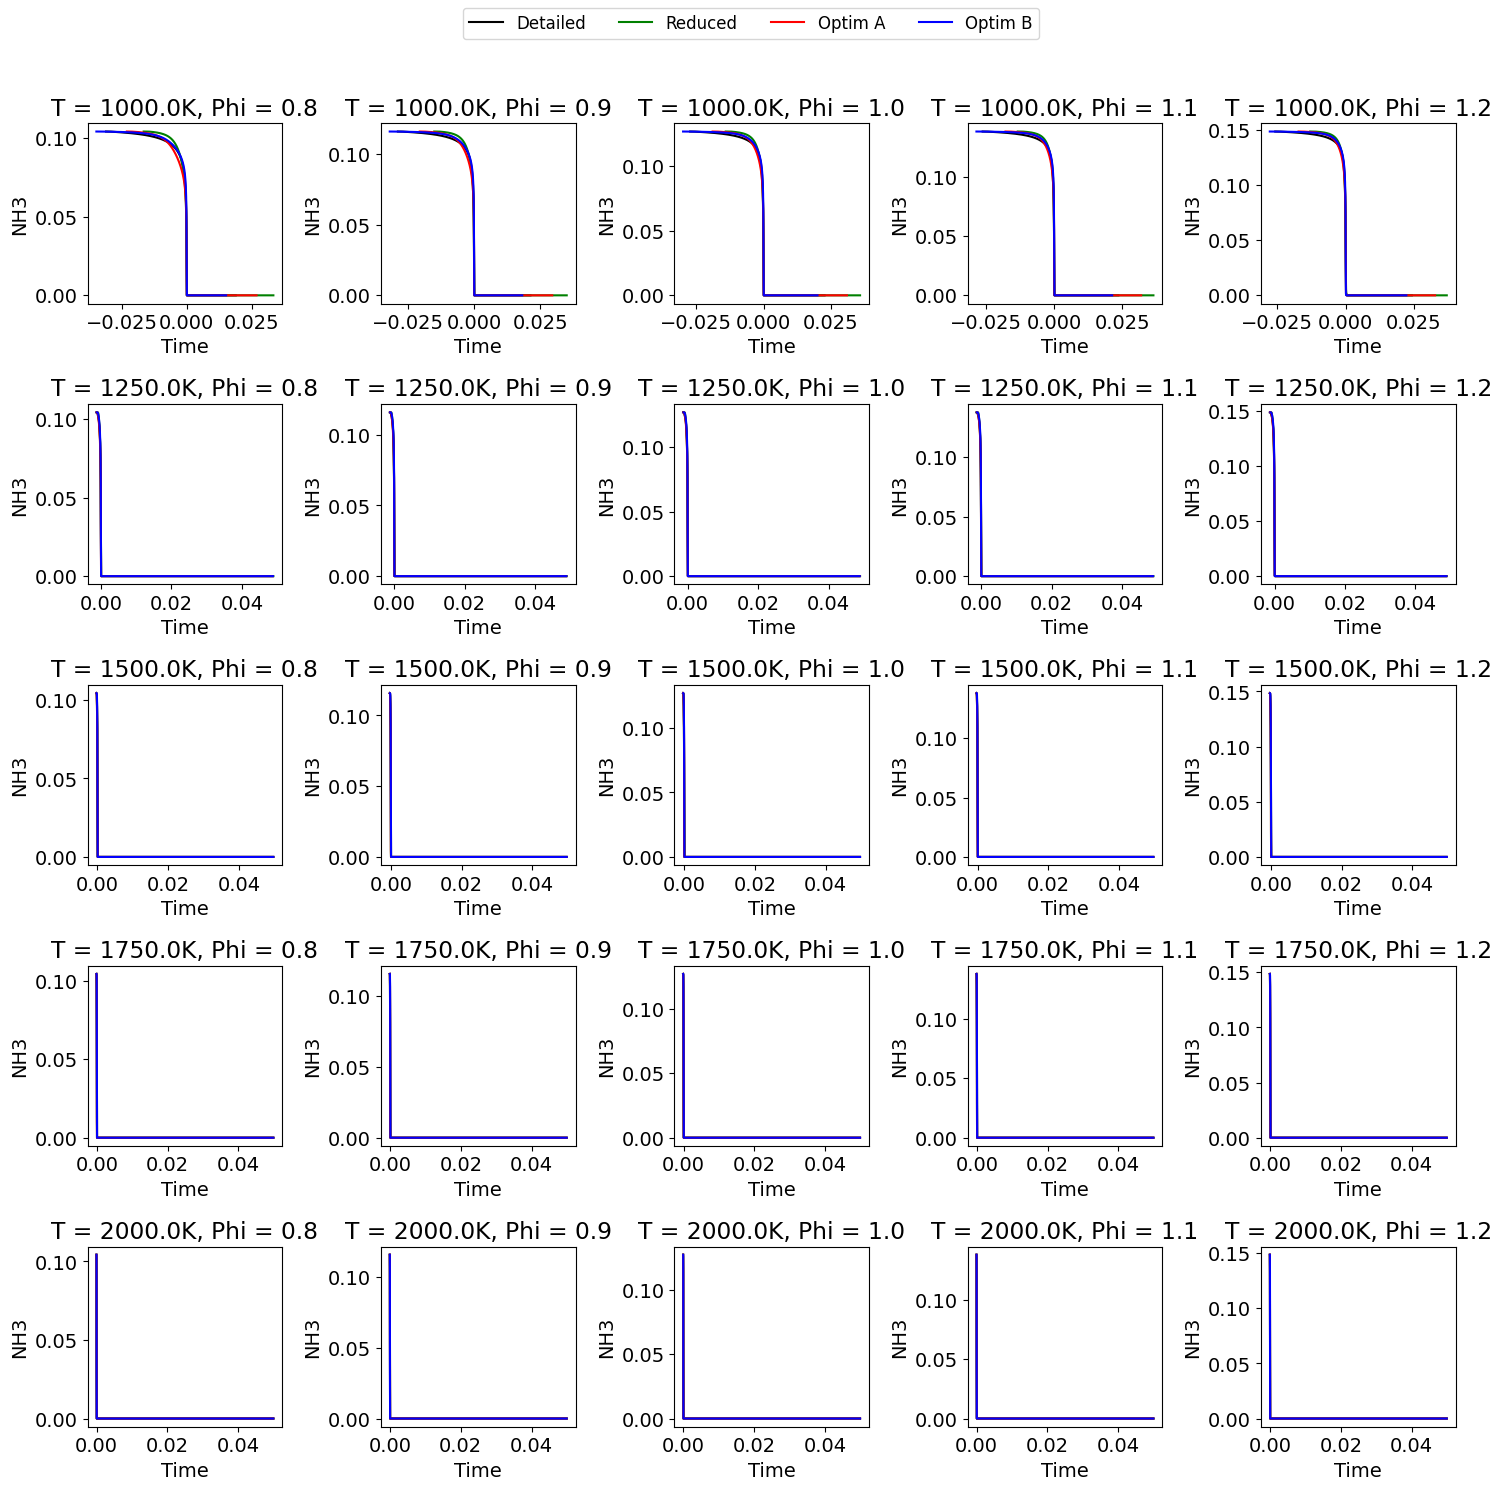

In [506]:
#Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2','H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]

ind = Targets.index("NH3")
print(Targets[ind])
# Create a single figure with 25 subplots (5 rows and 5 columns)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))  # Adjust the figsize as needed

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each case and plot on the corresponding subplot
for i in range(len(case)):
    ax = axs[i]
    
    ax.plot(Time_det[i], Y_Target_det[i][:,ind], "-k", label="Detailed")
    ax.plot(Time_red[i], Y_Target_red[i][:,ind], "-g", label="Reduced")
    ax.plot(Time_OptimA[i], Y_Target_OptimA[i][:,ind], "-r", label="Optim A")
    ax.plot(Time_OptimB[i], Y_Target_OptimB[i][:,ind], "-b", label="Optim B")
    ax.set_title(f"T = {case[i][1]}K, Phi = {case[i][2]}")
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{Targets[ind]}')

# Create a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()  # Get legend elements from one subplot
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the legend
plt.show()



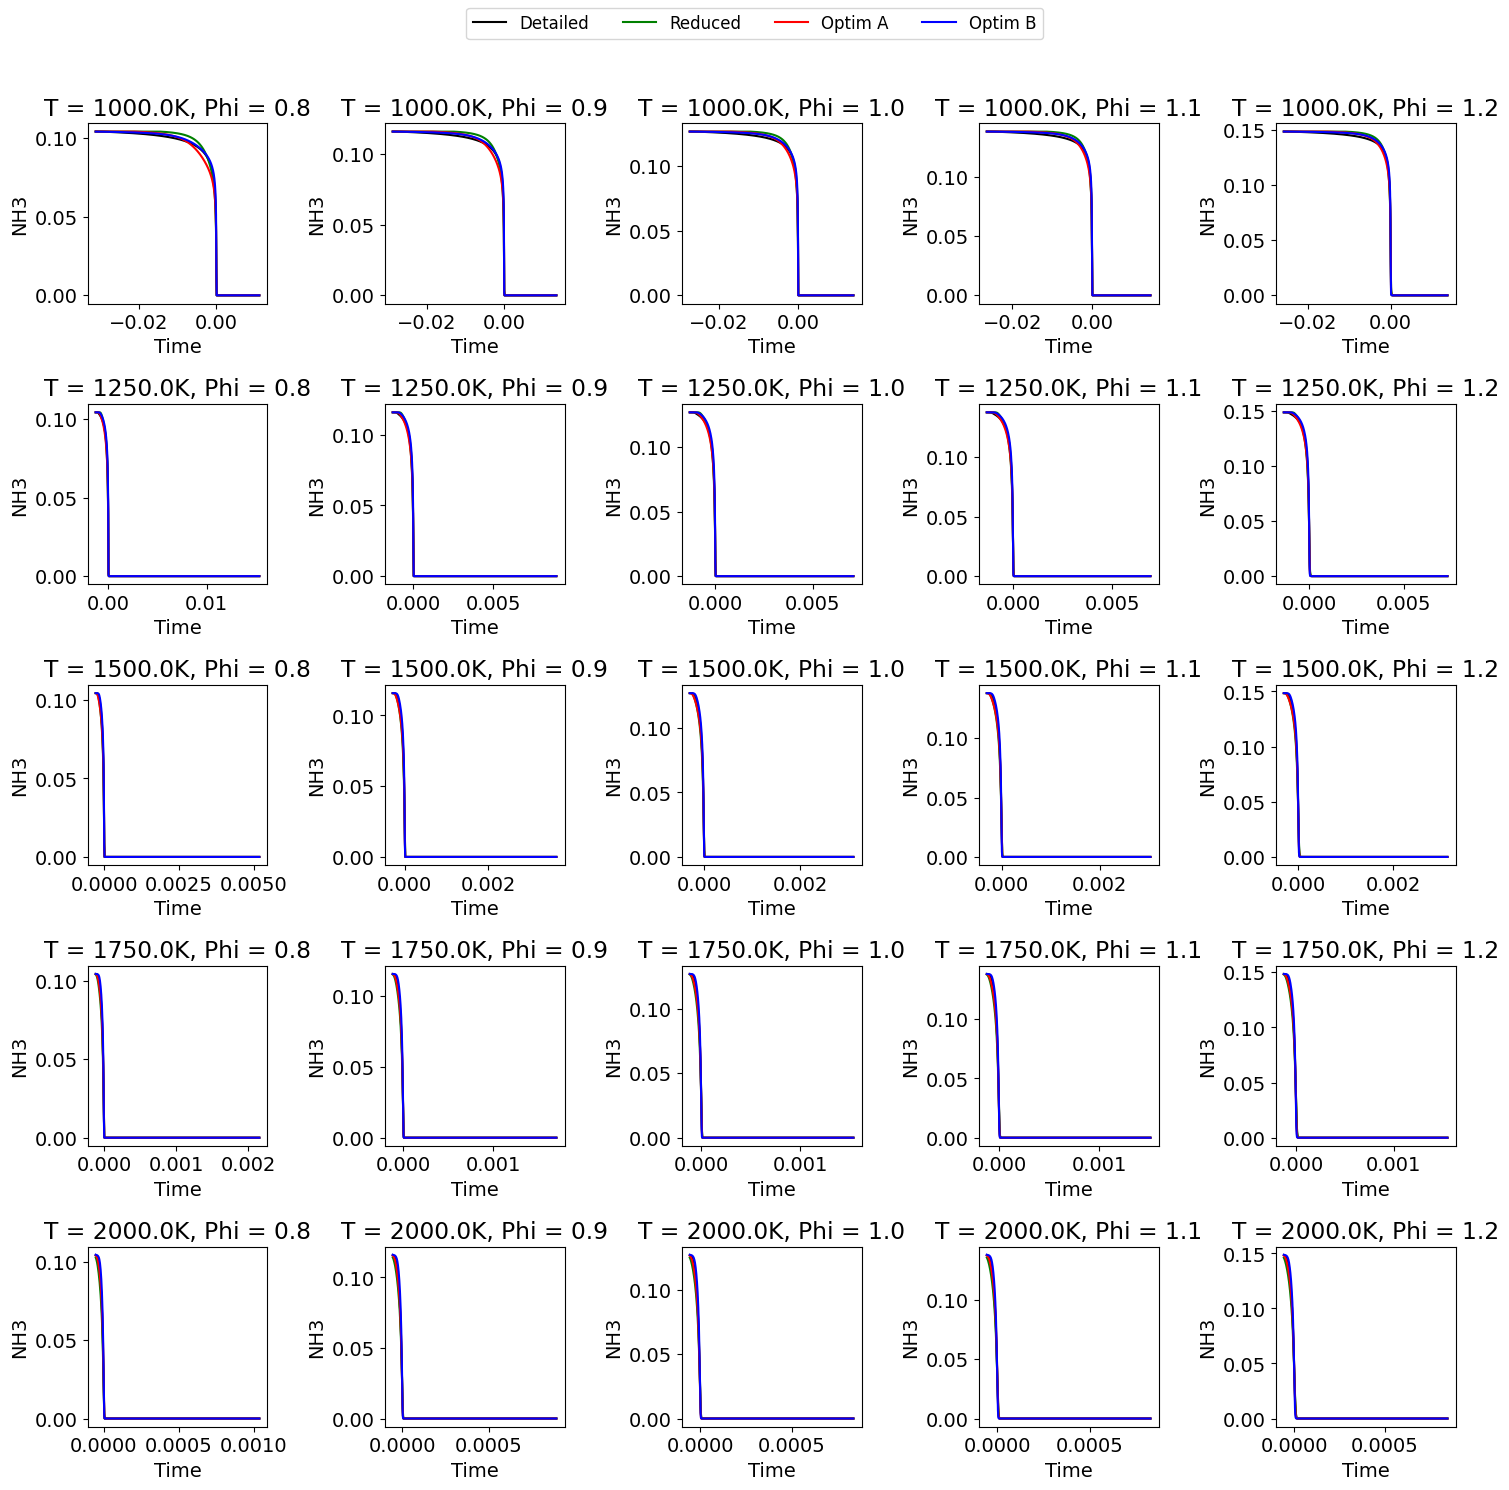

In [507]:
   
# Create a single figure with 25 subplots (5 rows and 5 columns)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))  # Adjust the figsize as needed

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()
# Loop through each case and plot on the corresponding subplot
for i in range(len(case)):
    ax = axs[i]
    
    ax.plot(Commun_time[i], Interp_Y_det[i][ind], "-k", label="Detailed")
    ax.plot(Commun_time[i], Interp_Y_red[i][ind], "-g", label="Reduced")
    ax.plot(Commun_time[i], Interp_Y_OptimA[i][ind], "-r", label="Optim A")
    ax.plot(Commun_time[i], Interp_Y_OptimB[i][ind], "-b", label="Optim B")
    
    ax.set_title(f"T = {case[i][1]}K, Phi = {case[i][2]}")
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{Targets[ind]}')

# Create a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()  # Get legend elements from one subplot
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the legend
plt.show()



# Min Max Scaler (0-1)

In [508]:
def Standard_Y (data_ref,case,spec):
    output = [] 
    scaler = []
    for c in range(len(case)) : 
        loc_data_ref = data_ref[c]
        loc_output =[]
        loc_scaler = []
        
        for s in range(len(spec)) :  
            scl = MinMaxScaler() 
            scl.fit(loc_data_ref[s])
            loc_output.append(scl.transform(loc_data_ref[s]))
            loc_scaler.append(scl)
        output.append(loc_output)
        scaler.append(loc_scaler)
    return output,scaler 

def Standard_Y_rdrc(data_red,scaler,case,spec) : 
    output =[] 
    for c in range(len(case)) : 
        loc_output =[]
        loc_data_red = data_red[c]
        loc_scaler = scaler[c]
        for s in range(len(spec)) : 
            scl=loc_scaler[s] 
            loc_output.append(scl.transform(loc_data_red[s]))
        
        output.append(loc_output) 
    return output 


def Standard_T(data_ref,case): 
    output = [] 
    scaler = [] 
    for c in range(len(case)) : 
        scl = MinMaxScaler() 
        scl.fit(data_ref[c])
        output.append(scl.transform(data_ref[c]))
        scaler.append(scl)
    return output,scaler

def Standar_T_rdrc(data_red,scaler,case): 
    output = [] 
    for c in range(len(case)) : 
        scl = scaler[c]
        output.append(scl.transform(data_red[c]))
    return output 
  

In [509]:

Scale_Interp_Y_det,Scal_Y_det = Standard_Y(Interp_Y_det,case,Targets)
Scale_Interp_Y_red = Standard_Y_rdrc(Interp_Y_red,Scal_Y_det,case,Targets)
Scale_Interp_Y_OptimA = Standard_Y_rdrc(Interp_Y_OptimA,Scal_Y_det,case,Targets)
Scale_Interp_Y_OptimB= Standard_Y_rdrc(Interp_Y_OptimB,Scal_Y_det,case,Targets)

Scale_Interp_Temp_det,Scal_T_det = Standard_T(Interp_Temp_det,case)
Scale_Interp_Temp_red=Standar_T_rdrc(Interp_Temp_red,Scal_T_det,case)
Scale_Interp_Temp_OptimA=Standar_T_rdrc(Interp_Temp_OptimA,Scal_T_det,case)
Scale_Interp_Temp_OptimB=Standar_T_rdrc(Interp_Temp_OptimB,Scal_T_det,case)


# Transformed Data

In [510]:
# Commun_time
# Interp_Y_det  
# Interp_Y_red
# Interp_Y_OptimA
# Interp_Y_OptimB
# Interp_Temp_det 
# Interp_Temp_red
# Interp_Temp_OptimA
# Interp_Temp_OptimB
# IDT_det 
# IDT_red
# IDT_OptimA
# IDT_OptimB


# Absolute Error

In [511]:
Scaler = False  

if Scaler == False : 
    

    Err_Y_abs = np.abs(np.array(Interp_Y_det)-np.array(Interp_Y_red))
    Err_T_abs = np.abs(np.array(Interp_Temp_det)-np.array(Interp_Temp_red))
    Err_IDT_abs = np.abs(np.array(IDT_det)-np.array(IDT_red))

    Err_Y_OptimA_abs = np.abs(np.array(Interp_Y_det)-np.array(Interp_Y_OptimA))
    Err_T_OptimA_abs = np.abs(np.array(Interp_Temp_det)-np.array(Interp_Temp_OptimA))
    Err_IDT_OptimA_abs = np.abs(np.array(IDT_det)-np.array(IDT_OptimA))

    Err_Y_OptimB_abs = np.abs(np.array(Interp_Y_det)-np.array(Interp_Y_OptimB))
    Err_T_OptimB_abs = np.abs(np.array(Interp_Temp_det)-np.array(Interp_Temp_OptimB))
    Err_IDT_OptimB_abs = np.abs(np.array(IDT_det)-np.array(IDT_OptimB))

elif Scaler == True : 
    Err_Y_abs = np.abs(np.array(Scale_Interp_Y_det)-np.array(Scale_Interp_Y_red))
    Err_T_abs = np.abs(np.array(Scale_Interp_Temp_det)-np.array(Scale_Interp_Temp_red))
    Err_IDT_abs = np.abs(np.array(IDT_det)-np.array(IDT_red))

    Err_Y_OptimA_abs = np.abs(np.array(Scale_Interp_Y_det)-np.array(Scale_Interp_Y_OptimA))
    Err_T_OptimA_abs = np.abs(np.array(Scale_Interp_Temp_det)-np.array(Scale_Interp_Temp_OptimA))
    Err_IDT_OptimA_abs = np.abs(np.array(IDT_det)-np.array(IDT_OptimA))

    Err_Y_OptimB_abs = np.abs(np.array(Scale_Interp_Y_det)-np.array(Scale_Interp_Y_OptimB))
    Err_T_OptimB_abs = np.abs(np.array(Scale_Interp_Temp_det)-np.array(Scale_Interp_Temp_OptimB))
    Err_IDT_OptimB_abs = np.abs(np.array(IDT_det)-np.array(IDT_OptimB))

# print(np.shape(Interp_Y_det))
# print(np.shape(Interp_Y_red))
# print(np.shape(Err_Y_abs))
# print(np.shape(Err_T_abs))
# print(np.shape(Err_IDT_abs))

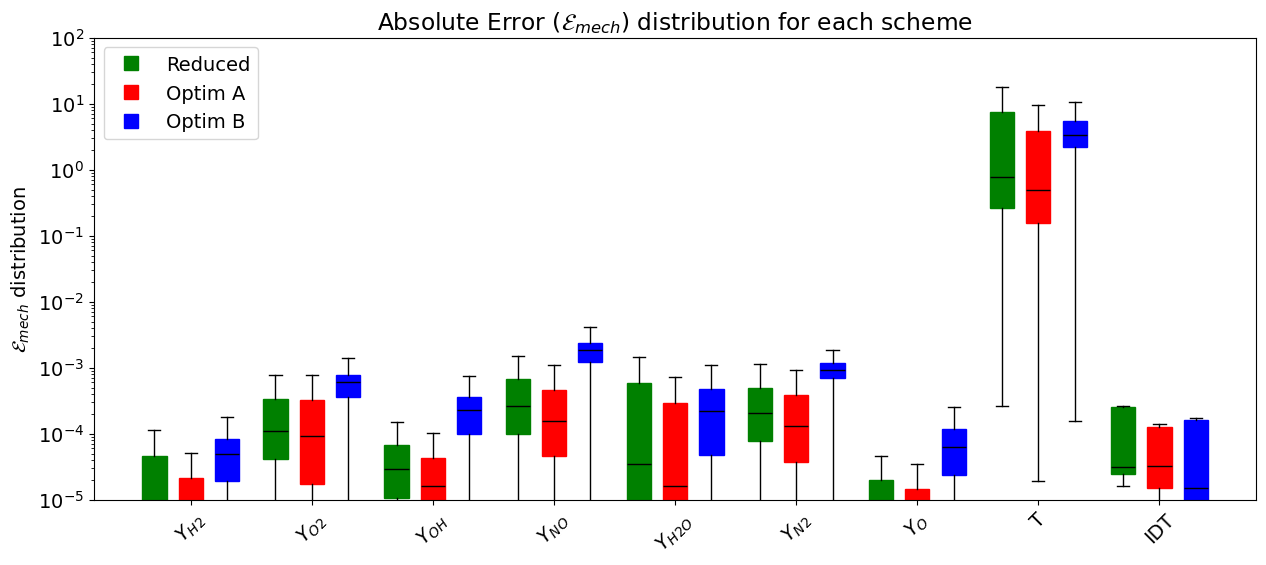

In [512]:
plt.figure(figsize=(15, 6))  # Augmente la taille pour éviter l'encombrement
remove =["NH3","NO2","N2O","H","NNH","NH2","HO2","N","N2H2","HNO","NH"]
# Décalages pour chaque type d'erreur (évite superposition)
offsets = [-0.3, 0., 0.3]  # Décalages pour les 3 courbes par groupe
colors = ['green', 'red', 'blue']
labels = ['Reduced', 'Optim A', 'Optim B']
# Boucle sur les variables de Target
a = 0 
New_Target=[]
for s in range(len(Targets)):
  
    data_list = [Err_Y_abs[:, s, :], Err_Y_OptimA_abs[:, s, :], Err_Y_OptimB_abs[:, s, :]]
    if Targets[s] not in remove :
        New_Target.append(Targets[s]) 
        for i, data in enumerate(data_list):
            plt.boxplot(
                np.array(data).flatten(),
                positions=[a + 1 + offsets[i]],
                showfliers=False,
                patch_artist=True,
                boxprops=dict(facecolor=colors[i], color=colors[i]),
                medianprops=dict(color='black'),
                widths=0.2  # Réduit la largeur pour éviter chevauchement
            )
        a = a+1 

# Ajout de T
data_list_T = [Err_T_abs[:, :], Err_T_OptimA_abs[:, :], Err_T_OptimB_abs[:, :]]
for i, data in enumerate(data_list_T):
    plt.boxplot(
        np.array(data).flatten(),
        positions=[len(New_Target) + 1 + offsets[i]],  # Décalé après Targets
        showfliers=False,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i], color=colors[i]),
        medianprops=dict(color='black'),
        widths=0.2
    )

# Ajout de IDT
data_list_IDT = [Err_IDT_abs[:], Err_IDT_OptimA_abs[:], Err_IDT_OptimB_abs[:]]
for i, data in enumerate(data_list_IDT):
    plt.boxplot(
        np.array(data).flatten(),
        positions=[len(New_Target) + 2 + offsets[i]],  # Décalé après T
        showfliers=False,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i], color=colors[i]),
        medianprops=dict(color='black'),
        widths=0.2
    )

# Ajout d'une légende
legend_patches = [plt.Line2D([0], [0], color=col, marker='s', markersize=10, linestyle='None', label=lab) 
                  for col, lab in zip(colors, labels)]
plt.legend(handles=legend_patches, loc='upper left')
# #For T Box
# plt.hlines(10e-6,7.5,8.5)
# plt.hlines(20,7.5,8.5)
# plt.vlines(7.5,10e-6,20)
# plt.vlines(8.5,10e-6,20)

#For NO Box
# plt.hlines(10e-6,3.5,4.5)
# plt.hlines(5e-3,3.5,4.5)
# plt.vlines(3.5,10e-6,5e-3)
# plt.vlines(4.5,10e-6,5e-3)
NT = [rf"$Y_{{{x}}}$" for x in New_Target]
plt.xticks(ticks=range(1, len(NT) + 3), labels=NT + ["T", "IDT"], rotation=45)
plt.ylabel(r"$\mathcal{E}_{mech}$ distribution")  # Ajoute un label
plt.title(r"Absolute Error ($\mathcal{E}_{mech}$) distribution for each scheme")  # Ajoute un titre
plt.yscale("log")
plt.ylim([1e-5, 1e2])
plt.savefig("AE_25_cases.png")
plt.show()


/tmp/ipykernel_6004/2488527115.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


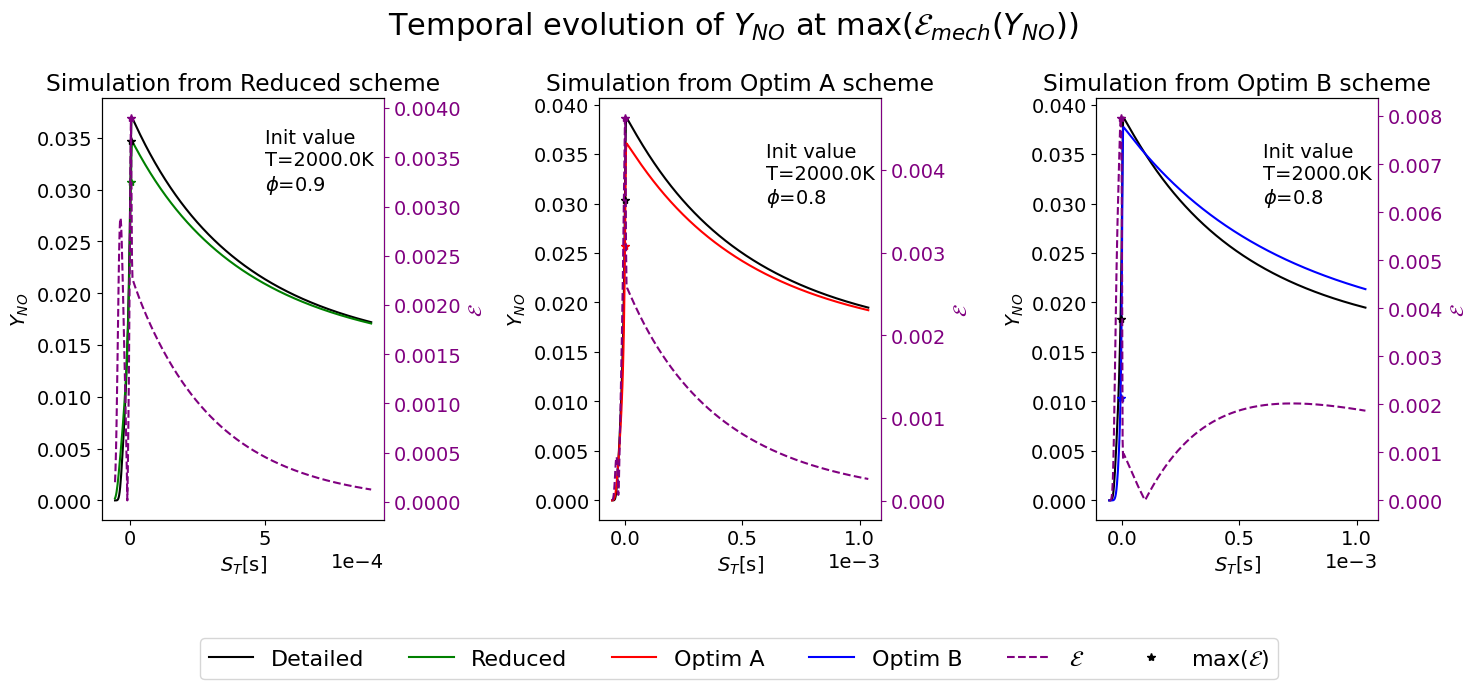

In [513]:
plt.rcParams.update({'font.size': 14})

# Create the figure with a size of 15x6
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Index of NO in the species list
spec = "NO"
ind = Targets.index(spec)

# Subplot 1: Reduced case
ax1 = axes[0]
ind_red = np.argmax(np.max(Err_Y_abs[:, ind], axis=1))
indice_temps = np.where(Err_Y_abs[ind_red, ind] == np.max(np.max(Err_Y_abs[:, ind], axis=1)))[0][0]
ax1.plot(Commun_time[ind_red], Interp_Y_det[ind_red][ind], 'k')  # Detailed
ax1.plot(Commun_time[ind_red], Interp_Y_red[ind_red][ind], 'g')  # Reduced
ax1.plot(Commun_time[ind_red][indice_temps], Interp_Y_red[ind_red][ind][indice_temps], '*g')
ax1.plot(Commun_time[ind_red][indice_temps], Interp_Y_det[ind_red][ind][indice_temps], '*k')
ax1.set_title("Simulation from Reduced scheme")
ax1.text(5.e-4,0.030,"Init value\n"
         rf"T={case[ind_red][1]}K "
         "\n"
         rf"$\phi$={case[ind_red][2]} ")
ax1.set_ylabel(r"$Y _{NO}$")
ax1.set_xlabel(r"$S_T$[s]")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# Create secondary y-axis for error
ax2 = ax1.twinx()
ax2.plot(Commun_time[ind_red], Err_Y_abs[ind_red][ind], linestyle = "--",color = "purple")
ax2.plot(Commun_time[ind_red][indice_temps], Err_Y_abs[ind_red][ind][indice_temps],  marker = '*',linestyle = None,color="purple")
ax2.set_ylabel(r'$\mathcal{E}$')
ax2.spines["right"].set_color('purple')
ax2.tick_params(colors="purple")
ax2.yaxis.label.set_color("purple")

# Subplot 2: Optim A case
ax3 = axes[1]
ind_A = np.argmax(np.max(Err_Y_OptimA_abs[:, ind], axis=1))
indice_temps_A = np.where(Err_Y_OptimA_abs[ind_A, ind] == np.max(np.max(Err_Y_OptimA_abs[:, ind], axis=1)))[0][0]
ax3.plot(Commun_time[ind_A], Interp_Y_det[ind_A][ind], 'k')  # Detailed
ax3.plot(Commun_time[ind_A], Interp_Y_OptimA[ind_A][ind], 'r')  # Optim A
ax3.plot(Commun_time[ind_A][indice_temps_A], Interp_Y_OptimA[ind_A][ind][indice_temps_A], '*r')
ax3.plot(Commun_time[ind_A][indice_temps_A], Interp_Y_det[ind_A][ind][indice_temps_A], '*k')
ax3.set_ylabel(r"$Y _{NO}$")
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_xlabel(r"$S_T$[s]")
ax3.set_title("Simulation from Optim A scheme")
ax3.text(6e-4,0.030,"Init value\n"
         rf"T={case[ind_A][1]}K "
         "\n"
         rf"$\phi$={case[ind_A][2]} ")
# Create secondary y-axis for error
ax4 = ax3.twinx()
ax4.plot(Commun_time[ind_A], Err_Y_OptimA_abs[ind_A][ind], linestyle = "--",color = "purple")
ax4.plot(Commun_time[ind_A][indice_temps_A], Err_Y_OptimA_abs[ind_A][ind][indice_temps_A],  marker = '*',linestyle = None,color="purple")
ax4.set_ylabel(r'$\mathcal{E}$')
ax4.spines["right"].set_color('purple')
ax4.tick_params(colors="purple")
ax4.yaxis.label.set_color("purple")

# Subplot 3: Optim B case
ax5 = axes[2]
ind_B = np.argmax(np.max(Err_Y_OptimB_abs[:, ind], axis=1))
indice_temps_B = np.where(Err_Y_OptimB_abs[ind_B, ind] == np.max(np.max(Err_Y_OptimB_abs[:, ind], axis=1)))[0][0]
ax5.plot(Commun_time[ind_B], Interp_Y_det[ind_B][ind], 'k')  # Detailed
ax5.plot(Commun_time[ind_B], Interp_Y_OptimB[ind_B][ind], 'b')  # Optim B
ax5.plot(Commun_time[ind_B][indice_temps_B], Interp_Y_OptimB[ind_B][ind][indice_temps_B], '*b')
ax5.plot(Commun_time[ind_B][indice_temps_B], Interp_Y_det[ind_B][ind][indice_temps_B], '*k')
ax5.set_ylabel(r"$Y _{NO}$")
ax5.set_xlabel(r"$S_T$[s]")
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.set_title("Simulation from Optim B scheme")
ax5.text(6e-4,0.030,"Init value\n"
         rf"T={case[ind_B][1]}K "
         "\n"
         rf"$\phi$={case[ind_B][2]} ")
# Create secondary y-axis for error
ax6 = ax5.twinx()
ax6.plot(Commun_time[ind_B], Err_Y_OptimB_abs[ind_B][ind], linestyle = "--",color = "purple")
ax6.plot(Commun_time[ind_B][indice_temps_B], Err_Y_OptimB_abs[ind_B][ind][indice_temps_B], marker = '*',linestyle = None,color="purple")
ax6.set_ylabel(r'$\mathcal{E}$')
ax6.spines["right"].set_color('purple')
ax6.tick_params(colors="purple")
ax6.yaxis.label.set_color("purple")



# Create a general legend
lines = [
    plt.Line2D([0], [0], color='k', label="Detailed"),     # Black line
    plt.Line2D([0], [0], color='g', label="Reduced"),      # Green line
    plt.Line2D([0], [0], color='r', label="Optim A"),      # Red line
    plt.Line2D([0], [0], color='b', label="Optim B"),      # Blue line
    plt.Line2D([0], [0], color='purple', linestyle='--', label=r"$\mathcal{E}$"),  # Dashed magenta line
    plt.Line2D([0], [0], color='k', marker='*', linestyle='None', label=r"max$(\mathcal{E})$")
]
fig.suptitle(r"Temporal evolution of $Y_{NO}$ at max$(\mathcal{E}_{mech}(Y_{NO}))$  ", fontsize=22)
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=16)

fig.tight_layout()  # Adjust layout for better visibility
fig.savefig(f"{spec}_Max_case_25_each_scheme.png")
fig.show()


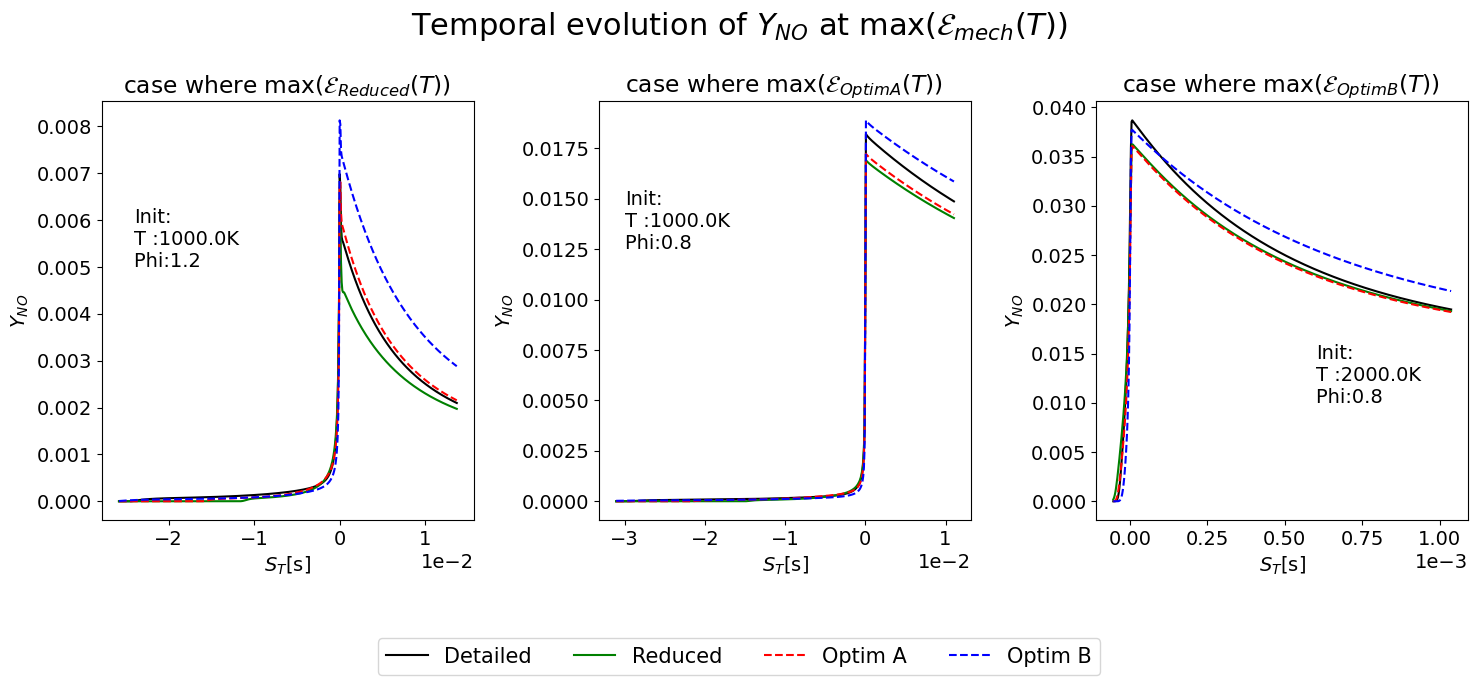

In [514]:
plt.rcParams.update({'font.size': 14})
# Create the figure with a size of 15x6
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Index of NO in the species list
spec = "NO"
ind = Targets.index(spec)

# Subplot 1: Reduced case
ax1 = axes[0]

ind_red = np.argmax(np.max(Err_T_abs, axis=1)) # Take if we want sim where AE(T) is max 
# ind_red = np.argmax(np.max(Err_Y_abs[:, ind], axis=1))  # Take if we want sim where AE(spec) is max


ax1.plot(Commun_time[ind_red], Interp_Y_det[ind_red][ind], '-k',)  # Detailed
ax1.plot(Commun_time[ind_red], Interp_Y_red[ind_red][ind], '-g')  # Reduced
ax1.plot(Commun_time[ind_red], Interp_Y_OptimA[ind_red][ind], '--r',alpha = 1) #Optim A 
ax1.plot(Commun_time[ind_red], Interp_Y_OptimB[ind_red][ind], '--b') # Optim B 
ax1.text(-2.4e-2,0.005,f"Init:\nT :{case[ind_red][1]}K \nPhi:{case[ind_red][2]} ")
ax1.set_title(r"case where max$(\mathcal{E}_{Reduced}(T))$ ")
ax1.set_ylabel(r"$Y_{NO}$")
ax1.set_xlabel(r"$S_T$[s]")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


# Subplot 2: Optim A case
ax3 = axes[1]
ind_A = np.argmax(np.max(Err_T_OptimA_abs, axis=1))# Take if we want sim where AE(T) is max 
# ind_A = np.argmax(np.max(Err_Y_OptimA_abs[:, ind], axis=1)) # Take if we want sim where AE(spec) is max

ax3.plot(Commun_time[ind_A], Interp_Y_det[ind_A][ind], 'k')  # Detailed
ax3.plot(Commun_time[ind_A], Interp_Y_red[ind_A][ind], 'g')  # Reduced
ax3.plot(Commun_time[ind_A], Interp_Y_OptimA[ind_A][ind], '--r')  # Optim A
ax3.plot(Commun_time[ind_A], Interp_Y_OptimB[ind_A][ind], '--b')  # Optim B
ax3.set_ylabel(r"$Y_{NO}$")
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_xlabel(r"$S_T$[s]")
ax3.text(-3e-2,0.0125,f"Init:\nT :{case[ind_A][1]}K \nPhi:{case[ind_A][2]} ")
ax3.set_title(r"case where max$(\mathcal{E}_{Optim A}(T))$ ")

# Subplot 3: Optim B case
ax5 = axes[2]
ind_B = np.argmax(np.max(Err_T_OptimB_abs, axis=1)) # Take if we want sim where AE(T) is max 
# ind_B = np.argmax(np.max(Err_Y_OptimB_abs[:, ind], axis=1)) # Take if we want sim where AE(spec) is max

ax5.plot(Commun_time[ind_B], Interp_Y_det[ind_B][ind], 'k')  # Detailed
ax5.plot(Commun_time[ind_B], Interp_Y_red[ind_B][ind], 'g')  # Reduced
ax5.plot(Commun_time[ind_B], Interp_Y_OptimA[ind_B][ind], '--r')  # Optim A
ax5.plot(Commun_time[ind_B], Interp_Y_OptimB[ind_B][ind], '--b')  # Optim B
ax5.set_ylabel(r"$Y_{NO}$")
ax5.set_xlabel(r"$S_T$[s]")
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.text(6e-4,0.01,f"Init:\nT :{case[ind_B][1]}K \nPhi:{case[ind_B][2]} ")
ax5.set_title(r"case where max$(\mathcal{E}_{Optim B}(T))$ ")



# Create a general legend
lines = [
    plt.Line2D([0], [0], color='k', label="Detailed"),     # Black line
    plt.Line2D([0], [0], color='g', label="Reduced"),      # Green line
    plt.Line2D([0], [0], color='r',linestyle="--", label="Optim A"),      # Red line
    plt.Line2D([0], [0], color='b', linestyle="--",label="Optim B")      # Blue line
]

fig.suptitle(r"Temporal evolution of $Y_{NO}$ at max$(\mathcal{E}_{mech}(T))$", fontsize=22)
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=15)
fig.tight_layout()  # Adjust layout for better visibility
fig.savefig(f"{spec}_Max_case_25_all_scheme.png")
plt.show()


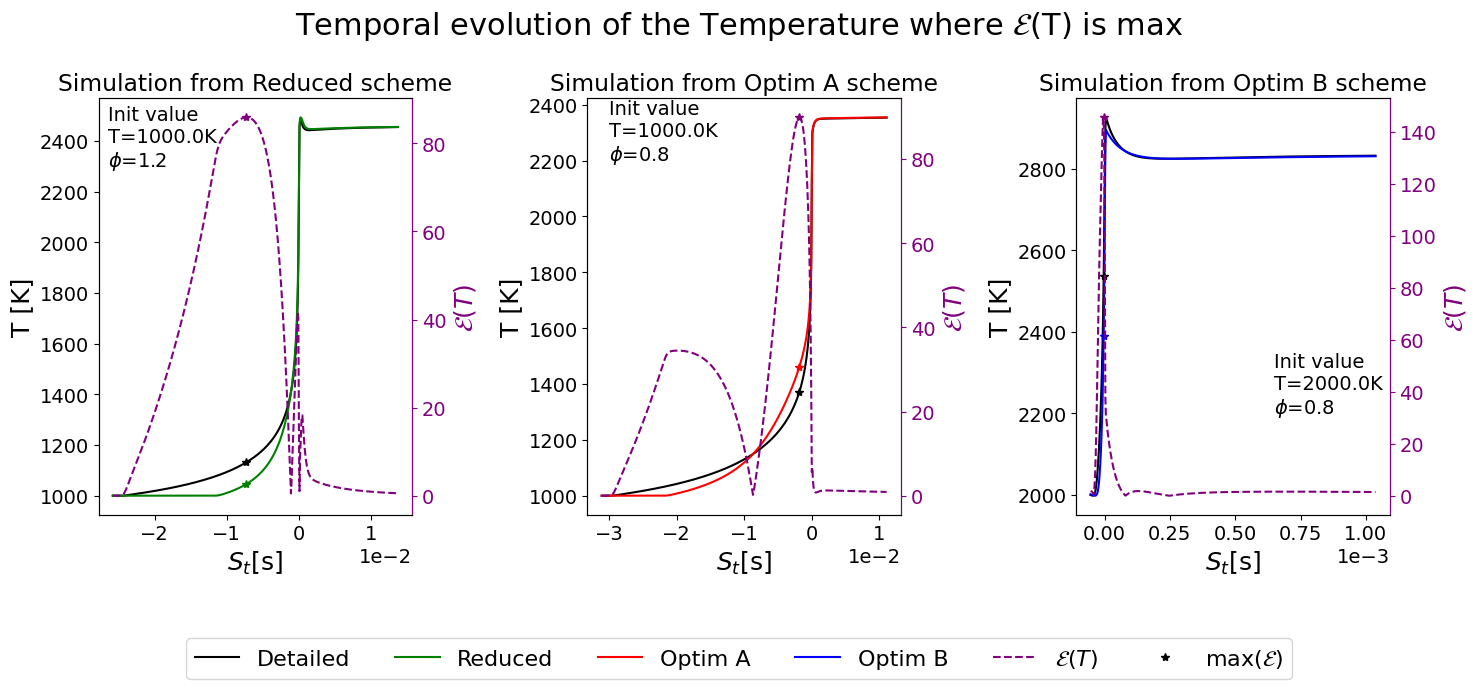

In [515]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 14})

# Create the figure with a size of 15x6
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Subplot 1: Reduced case
ax1 = axes[0]
indice = np.argmax(np.max(Err_T_abs, axis=1))
indice_temps = np.where(Err_T_abs[indice] == np.max(np.max(Err_T_abs, axis=1)))[0][0]
ax1.plot(Commun_time[indice], Interp_Temp_det[indice], 'k')  # Detailed
ax1.plot(Commun_time[indice], Interp_Temp_red[indice], 'g')  # Reduced
ax1.plot(Commun_time[indice][indice_temps], Interp_Temp_red[indice][indice_temps], '*g')
ax1.plot(Commun_time[indice][indice_temps], Interp_Temp_det[indice][indice_temps], '*k')
ax1.set_title(f"Simulation from Reduced scheme")
ax1.text(-2.65e-2,2300,"Init value\n"
         rf"T={case[indice][1]}K "
         "\n"
         rf"$\phi$={case[indice][2]} ")
ax1.set_ylabel("T [K]",fontsize=18)
ax1.set_xlabel(r"$S_t$[s]",fontsize=18)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# Create secondary y-axis for error
ax2 = ax1.twinx()
ax2.plot(Commun_time[indice], Err_T_abs[indice], linestyle = '--',color = "purple")
ax2.plot(Commun_time[indice][indice_temps], Err_T_abs[indice][indice_temps], marker="*" ,linestyle = None,color = "purple")
ax2.set_ylabel(r"$\mathcal{E}(T)$",fontsize=18)
ax2.spines["right"].set_color('purple')
ax2.tick_params(colors="purple")
ax2.yaxis.label.set_color("purple")



# Subplot 2: Optim A case
ax3 = axes[1]
indice_A = np.argmax(np.max(Err_T_OptimA_abs, axis=1))
indice_temps_A = np.where(Err_T_OptimA_abs[indice_A] == np.max(np.max(Err_T_OptimA_abs, axis=1)))[0][0]
ax3.plot(Commun_time[indice_A], Interp_Temp_det[indice_A], 'k')  # Detailed
ax3.plot(Commun_time[indice_A], Interp_Temp_OptimA[indice_A], 'r')  # Optim A
ax3.plot(Commun_time[indice_A][indice_temps_A], Interp_Temp_OptimA[indice_A][indice_temps_A], '*r')
ax3.plot(Commun_time[indice_A][indice_temps_A], Interp_Temp_det[indice_A][indice_temps_A], '*k')
ax3.set_ylabel("T [K]",fontsize=18)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_xlabel(r"$S_t$[s]",fontsize=18)
ax3.text(-3e-2,2200,"Init value\n"
         rf"T={case[indice_A][1]}K "
         "\n"
         rf"$\phi$={case[indice_A][2]} ")
ax3.set_title(f"Simulation from Optim A scheme")
# Create secondary y-axis for error
ax4 = ax3.twinx()
ax4.plot(Commun_time[indice_A], Err_T_OptimA_abs[indice_A], linestyle = '--',color = "purple")
ax4.plot(Commun_time[indice_A][indice_temps_A], Err_T_OptimA_abs[indice_A][indice_temps_A], marker="*" ,linestyle = None,color = "purple")
ax4.set_ylabel(r"$\mathcal{E}(T)$",fontsize=18)
ax4.spines["right"].set_color('purple')
ax4.tick_params(colors="purple")
ax4.yaxis.label.set_color("purple")


# Subplot 3: Optim B case
ax5 = axes[2]
indice_B = np.argmax(np.max(Err_T_OptimB_abs, axis=1))
indice_temps_B = np.where(Err_T_OptimB_abs[indice_B] == np.max(np.max(Err_T_OptimB_abs, axis=1)))[0][0]
ax5.plot(Commun_time[indice_B], Interp_Temp_det[indice_B], 'k')  # Detailed
ax5.plot(Commun_time[indice_B], Interp_Temp_OptimB[indice_B], 'b')  # Optim B
ax5.plot(Commun_time[indice_B][indice_temps_B], Interp_Temp_OptimB[indice_B][indice_temps_B], '*b')
ax5.plot(Commun_time[indice_B][indice_temps_B], Interp_Temp_det[indice_B][indice_temps_B], '*k')
ax5.set_ylabel("T [K]",fontsize=18)
ax5.set_xlabel(r"$S_t$[s]",fontsize=18)
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.set_title(f"Simulation from Optim B scheme")
ax5.text(0.65e-3,2200,"Init value\n"
         rf"T={case[indice_B][1]}K "
         "\n"
         rf"$\phi$={case[indice_B][2]} ")

# Create secondary y-axis for error
ax6 = ax5.twinx()
ax6.spines["right"].set_color('purple')
ax6.tick_params(colors="purple")
ax6.yaxis.label.set_color("purple")
ax6.plot(Commun_time[indice_B], Err_T_OptimB_abs[indice_B], linestyle = '--',color = "purple")
ax6.plot(Commun_time[indice_B][indice_temps_B], Err_T_OptimB_abs[indice_B][indice_temps_B], marker="*" ,linestyle = None,color = "purple")
ax6.set_ylabel(r"$\mathcal{E}(T)$",fontsize=18)


# Create a general legend
lines = [
    plt.Line2D([0], [0], color='k', label="Detailed"),     # Black line
    plt.Line2D([0], [0], color='g', label="Reduced"),      # Green line
    plt.Line2D([0], [0], color='r', label="Optim A"),      # Red line
    plt.Line2D([0], [0], color='b', label="Optim B"),      # Blue line
    plt.Line2D([0], [0], color='purple', linestyle='--', label=r"$\mathcal{E}(T)$"),  # Dashed magenta line
    plt.Line2D([0], [0], color='k', marker='*',linestyle='None', label=r"max$\left(\mathcal{E}\right)$")  # Dashed magenta line
]
plt.suptitle(r"Temporal evolution of the Temperature where $\mathcal{E}$(T) is max", fontsize=22)
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=16)

plt.tight_layout()  # Adjust layout for better visibility
plt.savefig("Temperature_max_case_25.png")
plt.show()


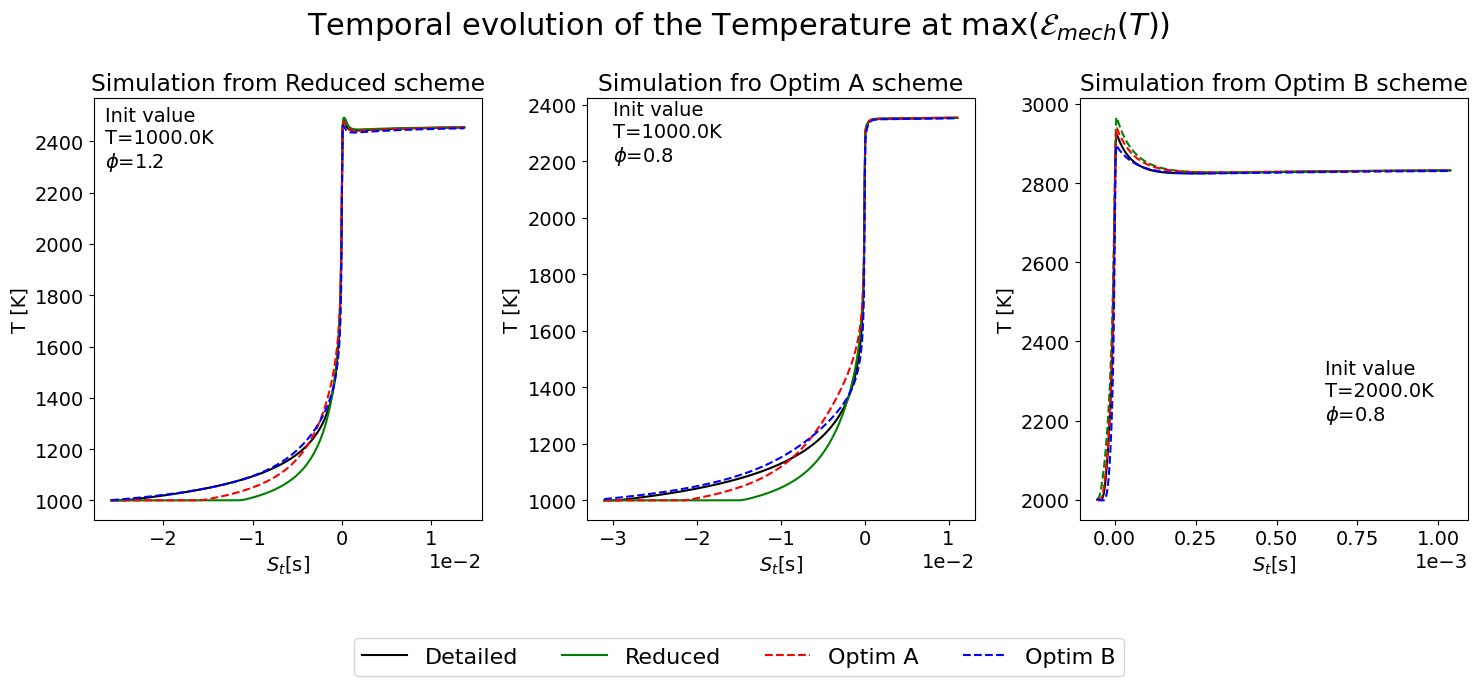

In [516]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 14})

# Create the figure with a size of 15x6
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Subplot 1: Reduced case
ax1 = axes[0]
indice = np.argmax(np.max(Err_T_abs, axis=1))
indice_temps = np.where(Err_T_abs[indice] == np.max(np.max(Err_T_abs, axis=1)))[0][0]
ax1.plot(Commun_time[indice], Interp_Temp_det[indice], 'k')  # Detailed
ax1.plot(Commun_time[indice], Interp_Temp_red[indice], 'g')  # Reduced
ax1.plot(Commun_time[indice], Interp_Temp_OptimA[indice], '--r')  # Detailed
ax1.plot(Commun_time[indice], Interp_Temp_OptimB[indice], '--b')  # Reduced

ax1.set_title(f"Simulation from Reduced scheme")
ax1.text(-2.65e-2,2300,"Init value\n"
         rf"T={case[indice][1]}K "
         "\n"
         rf"$\phi$={case[indice][2]} ")
ax1.set_ylabel("T [K]")
ax1.set_xlabel(r"$S_t$[s]")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Subplot 2: Optim A case
ax3 = axes[1]
indice_A = np.argmax(np.max(Err_T_OptimA_abs, axis=1))
indice_temps_A = np.where(Err_T_OptimA_abs[indice_A] == np.max(np.max(Err_T_OptimA_abs, axis=1)))[0][0]
ax3.plot(Commun_time[indice_A], Interp_Temp_det[indice_A], 'k')  # Detailed
ax3.plot(Commun_time[indice_A], Interp_Temp_red[indice_A], 'g')  # Optim A
ax3.plot(Commun_time[indice_A], Interp_Temp_OptimA[indice_A], '--r')  # Detailed
ax3.plot(Commun_time[indice_A], Interp_Temp_OptimB[indice_A], '--b')  # Reduced
ax3.set_ylabel("T [K]")
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.set_xlabel(r"$S_t$[s]")
ax3.text(-3e-2,2200,"Init value\n"
         rf"T={case[indice_A][1]}K "
         "\n"
         rf"$\phi$={case[indice_A][2]} ")
ax3.set_title(f"Simulation fro Optim A scheme")


# Subplot 3: Optim B case
ax5 = axes[2]
indice_B = np.argmax(np.max(Err_T_OptimB_abs, axis=1))
indice_temps_B = np.where(Err_T_OptimB_abs[indice_B] == np.max(np.max(Err_T_OptimB_abs, axis=1)))[0][0]
ax5.plot(Commun_time[indice_B], Interp_Temp_det[indice_B], 'k')  # Detailed
ax5.plot(Commun_time[indice_B], Interp_Temp_red[indice_B], '--g')  # Reduced
ax5.plot(Commun_time[indice_B], Interp_Temp_OptimA[indice_B], '--r')  # Optim A
ax5.plot(Commun_time[indice_B], Interp_Temp_OptimB[indice_B], '--b')  # Optim B

ax5.set_ylabel("T [K]")
ax5.set_xlabel(r"$S_t$[s]")
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.set_title(f"Simulation from Optim B scheme")
ax5.text(0.65e-3,2200,"Init value\n"
         rf"T={case[indice_B][1]}K "
         "\n"
         rf"$\phi$={case[indice_B][2]} ")


# Create a general legend
lines = [
    plt.Line2D([0], [0], color='k', label="Detailed"),     # Black line
    plt.Line2D([0], [0], color='g', label="Reduced"),      # Green line
    plt.Line2D([0], [0], color='r',linestyle="--", label="Optim A"),      # Red line
    plt.Line2D([0], [0], color='b',linestyle="--", label="Optim B"),      # Blue line
]
plt.suptitle(r"Temporal evolution of the Temperature at max$(\mathcal{E}_{mech}(T))$", fontsize=22)
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=16)

plt.tight_layout()  # Adjust layout for better visibility
plt.savefig("Temperature_max_case_25_all_scheme.png")
plt.show()



# Orch Error

In [517]:
eps = 1e-12
Err_Orch = np.abs(np.array(Interp_Y_det) - np.array(Interp_Y_red)) / np.maximum(np.abs(np.array(Interp_Y_det)), eps)
mask_target = np.abs(Interp_Y_det) < eps
Err_Orch[mask_target] = 0

Err_Orch_OptimA = np.abs(np.array(Interp_Y_det) - np.array(Interp_Y_OptimA)) / np.maximum(np.abs(np.array(Interp_Y_det)), eps)
mask_target = np.abs(Interp_Y_det) < eps
Err_Orch_OptimA[mask_target] = 0


Err_Orch_OptimB = np.abs(np.array(Interp_Y_det) - np.array(Interp_Y_OptimB)) / np.maximum(np.abs(np.array(Interp_Y_det)), eps)
mask_target = np.abs(Interp_Y_det) < eps
Err_Orch_OptimB[mask_target] = 0



coefficients = {
    "NO": 6.0,
    "NH": 3.5,
    "NH2": 3.5,
    "NNH": 5.0,
    "H2": 3.0,
    "NH3": 3.0,
    "O2": 3.0,
    "OH": 3.0,
    "O": 3.0,
    "H": 3.0

}
coef_non_target = 0.05

Err_Orch_coef = []
Err_Orch_OptimA_coef = []
Err_Orch_OptimB_coef = []
for spec in Targets : 
    
    if spec in coefficients : 
        k = coefficients[spec]
    else :
        k=0.05
    
    if spec in Targets : 
        ind = Targets.index(spec)
        
        Err_Orch_coef.append( k*np.sum(np.array(Err_Orch[:, ind, :]).flatten()))
        Err_Orch_OptimA_coef.append( k*np.sum(np.array(Err_Orch_OptimA[:, ind, :]).flatten()))
        Err_Orch_OptimB_coef.append( k*np.sum(np.array(Err_Orch_OptimB[:, ind, :]).flatten()))

        
    if spec in Non_Target : 
        ind = Non_Target.index(spec)
        Err_Orch_coef.append(k*np.sum(np.array(Err_Orch[:, ind, :]).flatten())) 
        Err_Orch_OptimA_coef.append( k*np.sum(np.array(Err_Orch_OptimA[:, ind, :]).flatten()))
        Err_Orch_OptimB_coef.append( k*np.sum(np.array(Err_Orch_OptimB[:, ind, :]).flatten()))

print(f"{sum(Err_Orch_coef):.3e}")
print(f"{sum(Err_Orch_OptimA_coef):.3e}")
print(f"{sum(Err_Orch_OptimB_coef):.3e}")

1.035e+06
2.630e+05
4.424e+08


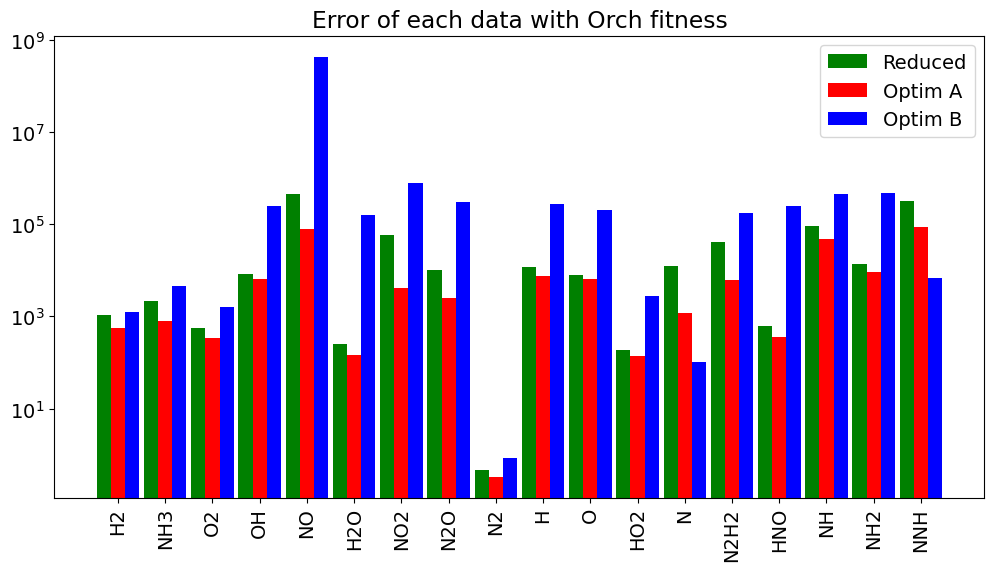

In [518]:
# Largeur des barres
bar_width = 0.3  

# Positions de base des barres
x = np.arange(len(Targets))  

plt.figure(figsize=(12, 6))  # Augmenter la taille pour meilleure lisibilité

# Tracer chaque jeu de barres avec un décalage
plt.bar(x - bar_width, Err_Orch_coef, width=bar_width, label="Reduced", color='green')
plt.bar(x, Err_Orch_OptimA_coef, width=bar_width, label="Optim A", color='red')
plt.bar(x + bar_width, Err_Orch_OptimB_coef, width=bar_width, label="Optim B", color='blue')

# Ajustement des labels et légende
plt.xticks(ticks=x, labels=Targets, rotation=90)
plt.title("Error of each data with Orch fitness")
plt.yscale("log")
plt.legend()  # Ajoute une légende pour identifier les courbes
# plt.ylim([10e3,10e9])

plt.savefig("ORCH_25_cases.png")
plt.show()

# PyMechOpt Error

In [519]:
# Commun_time
# Interp_Y_det  
# Interp_Y_red
# Interp_Y_OptimA
# Interp_Y_OptimB
# Interp_Temp_det 
# Interp_Temp_red
# Interp_Temp_OptimA
# Interp_Temp_OptimB
# IDT_det 
# IDT_red
# IDT_OptimA
# IDT_OptimB


In [492]:
def compute_errors(cases, Interp_Y_det, Interp_Y_red, Interp_Temp_det, Interp_Temp_red, 
                   IDT_det, IDT_red, Commun_time, Targets, Intergrate_Species, Peak_species):
    """
    Compute different error metrics for species integration, peak values, temperature, and ignition delay time (IDT).
    
    Parameters:
        cases (list): List of cases.
        Interp_Y_det (list): Detailed species mass fractions interpolated.
        Interp_Y_red (list): Reduced species mass fractions interpolated.
        Interp_Temp_det (list): Detailed temperature profiles.
        Interp_Temp_red (list): Reduced temperature profiles.
        IDT_det (list): Detailed ignition delay times.
        IDT_red (list): Reduced ignition delay times.
        Commun_time (list): Common time grids for each case.
        Targets (list): List of species names.
        Intergrate_Species (list): List of species for integration-based error.
        Peak_species (list): List of species for peak-value-based error.
    
    Returns:
        tuple: (F1, F2, F3, F4) lists containing error metrics.
    """
    
    F1, F2, F3, F4 = [], [], [], []

    for c in range(len(cases)):  
        loc_time = Commun_time[c]
        loc_Y_det = Interp_Y_det[c]
        loc_Y_red = Interp_Y_red[c]
        loc_T_det = Interp_Temp_det[c]
        loc_T_red = Interp_Temp_red[c]
        loc_IDT_det = IDT_det[c]
        loc_IDT_red = IDT_red[c]

        loc_F1, loc_F2 = [], []

        for s in range(len(Targets)):
            loc_loc_Y_det = loc_Y_det[s]
            loc_loc_Y_red = loc_Y_red[s]

            if Targets[s] in Intergrate_Species:
                top1 = np.trapezoid(np.abs(np.array(loc_loc_Y_red) - np.array(loc_loc_Y_det)), np.array(loc_time))
                bot1 = np.trapezoid(np.abs(np.array(loc_loc_Y_red)), np.array(loc_time))
                loc_F1.append((top1 / bot1) ** 2 if bot1 != 0 else 0)

            elif Targets[s] in Peak_species:
                top2 = np.max(loc_loc_Y_det) - np.max(loc_loc_Y_red)
                bot2 = np.max(loc_loc_Y_det)
                loc_F2.append((top2 / bot2) ** 2 if bot2 != 0 else 0)

        F1.append(loc_F1)
        F2.append(loc_F2)

        top3 = np.trapezoid(np.abs(loc_T_red - loc_T_det), loc_time)
        bot3 = np.trapezoid(np.abs(loc_T_det), loc_time)
        F3.append((top3 / bot3) ** 2 if bot3 != 0 else 0)

        top4 = loc_IDT_red - loc_IDT_det
        bot4 = loc_IDT_det
        F4.append((top4 / bot4) ** 2 if bot4 != 0 else 0)

    return F1, F2, F3, F4

In [493]:
# Commun_time
# Interp_Y_det  
# Interp_Y_red
# Interp_Y_OptimA
# Interp_Y_OptimB
# Interp_Temp_det 
# Interp_Temp_red
# Interp_Temp_OptimA
# Interp_Temp_OptimB
# IDT_det 
# IDT_red
# IDT_OptimA
# IDT_OptimB


In [520]:
Intergrate_Species =["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Peak_species = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]


F1_red, F2_red, F3_red, F4_red = compute_errors(case, Interp_Y_det, Interp_Y_red, Interp_Temp_det, Interp_Temp_red, 
                                IDT_det, IDT_red, Commun_time, Targets, Intergrate_Species, Peak_species)


F1_OptimA, F2_OptimA, F3_OptimA, F4_OptimA = compute_errors(case, Interp_Y_det, Interp_Y_OptimA, Interp_Temp_det, Interp_Temp_OptimA, 
                                IDT_det, IDT_OptimA, Commun_time, Targets, Intergrate_Species, Peak_species)


F1_OptimB, F2_OptimB, F3_OptimB, F4_OptimB = compute_errors(case, Interp_Y_det, Interp_Y_OptimB, Interp_Temp_det, Interp_Temp_OptimB, 
                                IDT_det, IDT_OptimB, Commun_time, Targets, Intergrate_Species, Peak_species)


In [521]:
print(np.sqrt(np.sum(F1_red)+np.sum(F2_red)+np.sum(F3_red)+np.sum(F4_red)))
print(np.sqrt(np.sum(F1_OptimA)+np.sum(F2_OptimA)+np.sum(F3_OptimA)+np.sum(F4_OptimA)))
print(np.sqrt(np.sum(F1_OptimB)+np.sum(F2_OptimB)+np.sum(F3_OptimB)+np.sum(F4_OptimB)))

5.9966362963747954
4.5049280067379405
5.91062211105757


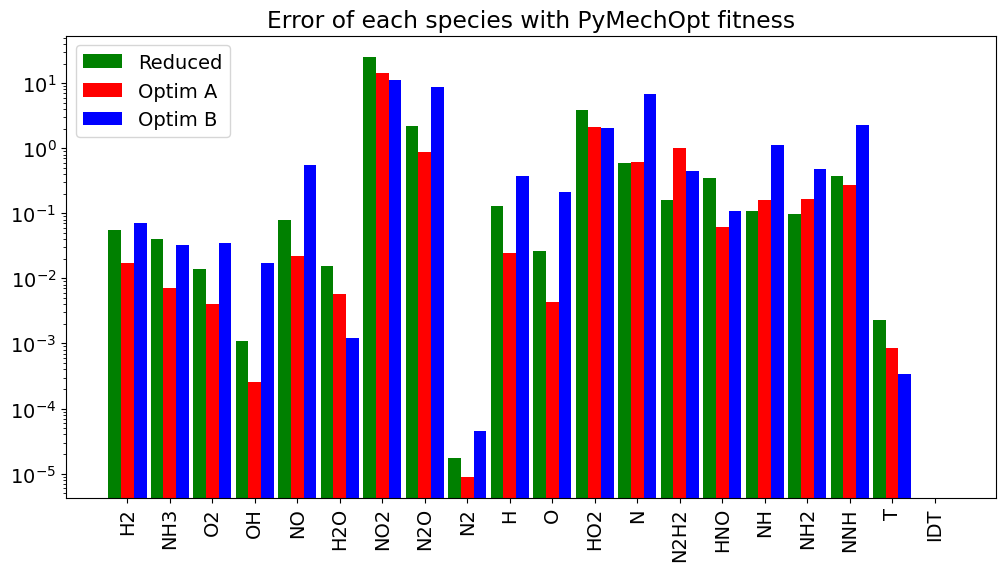

In [463]:
# Largeur des barres
bar_width = 0.3  

# Création des catégories X
categories = Intergrate_Species + Peak_species + ["T", "IDT"]
x = np.arange(len(categories))  # Positions de base

plt.figure(figsize=(12, 6))  # Augmenter la taille pour meilleure visibilité

# Tracer chaque jeu de barres avec un décalage
plt.bar(x - bar_width, np.concatenate([np.sum(F1_red, axis=0), np.sum(F2_red, axis=0), [sum(F3_red)], [sum(F4_red)]]), 
        width=bar_width, label="Reduced", color='green')

plt.bar(x, np.concatenate([np.sum(F1_OptimA, axis=0), np.sum(F2_OptimA, axis=0), [sum(F3_OptimA)], [sum(F4_OptimA)]]), 
        width=bar_width, label="Optim A", color='red')

plt.bar(x + bar_width, np.concatenate([np.sum(F1_OptimB, axis=0), np.sum(F2_OptimB, axis=0), [sum(F3_OptimB)], [sum(F4_OptimB)]]), 
        width=bar_width, label="Optim B", color='blue')

# Ajustement des labels et légende
plt.xticks(ticks=x, labels=categories, rotation=90)
plt.yscale("log")
plt.title("Error of each species with PyMechOpt fitness")
plt.legend()  # Ajout de la légende
plt.savefig("PyOptMech_25_cases.png")
plt.show()
